Mounting drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

Loading image

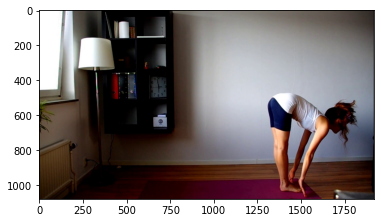

In [ ]:
img = image.load_img("/content/drive/MyDrive/Dataset/Testing/000004812.jpg")
plt.imshow(img)

Reading image

In [ ]:
cv2.imread("/content/drive/MyDrive/Dataset/Testing/000094342.jpg").shape

(720, 1280, 3)

Rescaling images

In [ ]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

Providing datasets to nueral network with specifications for training

In [ ]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/Dataset/Training',
target_size = (200, 200),
batch_size = 3,
class_mode = 'binary')

validation_dataset = train.flow_from_directory('/content/drive/MyDrive/Dataset/Validation',
target_size = (200, 200),
batch_size = 3,
class_mode = 'binary')

Found 62 images belonging to 2 classes.
Found 54 images belonging to 2 classes.


Labels generated with functions

In [ ]:
train_dataset.class_indices

{'Not Standing': 0, 'Standing': 1}

Using CNN with max pooling and applying filters

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape = (200, 200, 3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation = 'relu'),
                                    ##
                                    tf.keras.layers.Dense(1,activation = 'sigmoid'),
                                    ])

Compiling the model

In [ ]:
model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(learning_rate=0.001),
              metrics = ['accuracy'])

Training the model

In [ ]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch = 3,
                      epochs = 15,
                      validation_data = validation_dataset)

Epoch 1/15
3/3 [==============================] - 39s 18s/step - loss: 3.0316 - accuracy: 0.4444 - val_loss: 1.3763 - val_accuracy: 0.2593
Epoch 2/15
3/3 [==============================] - 48s 24s/step - loss: 2.0028 - accuracy: 0.5556 - val_loss: 0.9249 - val_accuracy: 0.2593
Epoch 3/15
3/3 [==============================] - 3s 1s/step - loss: 0.7792 - accuracy: 0.2222 - val_loss: 0.6717 - val_accuracy: 0.8704
Epoch 4/15
3/3 [==============================] - 3s 1s/step - loss: 0.6769 - accuracy: 0.6667 - val_loss: 0.6488 - val_accuracy: 0.8889
Epoch 5/15
3/3 [==============================] - 3s 1s/step - loss: 0.6688 - accuracy: 0.7778 - val_loss: 0.5998 - val_accuracy: 0.9259
Epoch 6/15
3/3 [==============================] - 2s 896ms/step - loss: 0.6292 - accuracy: 0.7778 - val_loss: 0.6198 - val_accuracy: 0.6481
Epoch 7/15
3/3 [==============================] - 2s 955ms/step - loss: 0.5962 - accuracy: 0.5556 - val_loss: 0.5420 - val_accuracy: 0.7037
Epoch 8/15
3/3 [===============

Testing

In [ ]:
dir_path = '/content/drive/MyDrive/Dataset/Testing'

for i in os.listdir(dir_path ):
  img = image.load_img(dir_path+'//'+ i, target_size=(200,200))
  plt.imshow(img)
  plt. show()

  X = image.img_to_array(img)
  X = np. expand_dims(X,axis =0)
  images = np.vstack([X])
  val = model.predict (images)
  if val == 0:
    print("Not Standing")
  else:
    print ("Standing")

Output hidden; open in https://colab.research.google.com to view.